# Учебный проект об основных закономерностях рейтинга фильмов на IMDB

Настоящий файл содержит расчет различных показателей датасета IMDB в рамках определенных преподавателем требований.

Содержательная часть кода описана отдельным текстовым полем

1. Загрузить туда найденные данные –> вывести первые 5 строчек датафрейма –> На 2-3 абзаца в ячейке типа Markdown (это было на основах питона) описать, что за данные, откуда, какие переменные там есть

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('IMDB.csv')
df=df.drop(columns='Unnamed: 0')
df.runtime=df.runtime.apply(lambda x: x.replace('min', '') if 'min' in x else x)
df.runtime=df.runtime.apply(lambda x: x.replace(',', '.') if ',' in x else x)
df.runtime=pd.to_numeric(df.runtime)

In [ ]:
df.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director
0,tt1016150,All Quiet on the Western Front,2022,R,148.0,"Action, Drama, War",7.8,A young German soldier's terrifying experience...,Edward Berger
1,tt2584384,Jojo Rabbit,2019,PG-13,108.0,"Comedy, Drama, War",7.9,A young German boy in the Hitler Youth whose h...,Taika Waititi
2,tt7693316,Devotion,2022,PG-13,139.0,"Action, Drama, War",6.6,A pair of U.S. Navy fighter pilots risk their ...,J.D. Dillard
3,tt9737876,Narvik: Hitler's First Defeat,2022,TV-14,108.0,"Drama, History, War",6.6,April 1940. The eyes of the world are on Narvi...,Erik Skjoldbjærg
4,tt0361748,Inglourious Basterds,2009,R,153.0,"Adventure, Drama, War",8.3,"In Nazi-occupied France during World War II, a...",Quentin Tarantino


**Описание переменных：**



*   movie_id (строка) - уникальный номер фильма\сериала, ID
*   movie_name (строка) - название фильма\сериала
*   year (целочисленная переменная) - год выпуска фильма\сериала
*   certificate (строка) - возрастной рейтинг фильма\сериала
*   runtime (вещественная переменная) - продолжительность фильма\сериала
*   genre (строка) - жанры фильма\сериала
*   rating (вещественная переменная) - рейтинг фильма\сериала
*   description (строка) - описание фильма\сериала
*   director (строка) - режиссёр фильма\сериала

2. Применить фильтрацию минимум по 5 условиям. Сделать содержательные выводы


Количество фильмов\сериалов, рейтинг которых превышает среднее значение, равняется 28252

In [ ]:
df[df['rating']>5.72].shape[0]

28252

Количество фильмов\сериалов, продолжительность которых превышает среднее значение, равняется 20138

In [ ]:
df[df['runtime']>98.1].shape[0]

20138

Больше всего фильмов снял William Beaudine - 95

In [ ]:
df.director.value_counts().head()

William Beaudine    95
Lew Landers         92
Richard Thorpe      84
Michael Curtiz      69
Sam Newfield        63
Name: director, dtype: int64

Больше всего фильмов было выпущено в 2014 г. - 1772

In [ ]:
df.year.value_counts().head()

2014    1772
2015    1666
2013    1645
2016    1505
2012    1505
Name: year, dtype: int64

Процент фильмов с рейтингом больше 7 и снятых в XXI в. равен 6,56%

In [ ]:
round(df[(df.year>2000)&(df.rating>7)].shape[0]*100/df.shape[0], 2)

6.56

Процентов фильмов с рейтингом больше 7 и снятых в XX в. равен 7,24%

In [ ]:
round(df[(df.year<2001)&(df.rating>7)].shape[0]*100/df.shape[0], 2)

7.24

Процент фильмов с рейтингом меньше 4 и снятых в XXI в. равен 6.92%

In [ ]:
round(df[(df.year>2000)&(df.rating<4)].shape[0]*100/df.shape[0], 2)

6.92

Средний рейтинг фильмов снятых в XX в. 5,9

In [ ]:
round(np.mean(df[(df.year<2001)]['rating']), 2)

5.9

Средний рейтинг фильмов снятых снятых в XXI в. 5,55

In [ ]:
round(np.mean(df[(df.year>2000)]['rating']), 2)

5.55

Количество фильмов, одним из жанров которых является исторический, 1459

In [ ]:
history_movies=df.genre.apply(lambda x: x if 'History' in x else 'NO')
history_movies.shape[0]-history_movies.value_counts()[0]

1459

3. Отсортировать данные минимум по 3 условиям. Сделать содержательные выводы

Наиболее популярные фильмы\сериалы с рейтингом 9.7 и выше

In [ ]:
df.sort_values(by='rating', ascending=False).head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director
25217,tt20912228,Prince Oak Oakleyski: Eurasia Handsome Sovereign,2022,Approved,60.0,Mystery,9.8,Prince Oak Oakleyski returned to Tashkent city...,Prince Oak Oakleyski
33608,tt1053817,Buried in Tucson,2007,Not Rated,70.0,"Adventure, Drama",9.8,"Anton and Lena have a simple, self-obsessed re...",Jeff Gallea
43864,tt21059328,Prince Oak Oakleyski Andronovo,2022,Approved,65.0,"Drama, Family",9.8,"It's a Family sort of genre, plus strong vibe ...","I. Kolyada, \nPrince Oak Oakleyski"
3836,tt21052610,Prince Oak Oakleyski: Lord Kandanai Maneesawath,2022,Approved,60.0,"Adventure, Biography, History",9.8,"Biography of his early life, team history, and...","I. Kolyada, \nPrince Oak Oakleyski"
3851,tt21114222,Prince of Eurasia,2022,Approved,60.0,"Action, Biography, History",9.7,Rare historical biography of Prince Oak Oakley...,"I. Kolyada, \nPrince Oak Oakleyski"


Фильмы с наибольшей продолжительностью достигают 776 минут

In [ ]:
df.sort_values(by='runtime', ascending=False).head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director
23768,tt0246135,Out 1,1971,Not Rated,776.0,"Drama, Mystery",7.5,"Following the May 1968 civil unrest in France,...","Jacques Rivette, \nSuzanne Schiffman"
14258,tt0131597,Split,2004,Not Rated,700.0,"Action, Crime, Sci-Fi",5.2,Split is a joltingly visual techno thriller th...,Chaim Bianco
320,tt0063794,War and Peace,1965,GP,453.0,"Drama, Romance, War",8.3,The Russian aristocracy prepares for the Frenc...,Sergey Bondarchuk
6258,tt0006206,Les vampires,1915,Not Rated,421.0,"Action, Adventure, Crime",7.3,An intrepid reporter and his loyal friend batt...,Louis Feuillade
2226,tt0006917,Liberty,1916,Passed,400.0,"Action, Adventure, War",3.7,A 20 part 2-reel Western film serial.,"Jacques Jaccard, \nHenry MacRae"


Самые старые сериалы\фильмы, представленные на IMDB относятся не позже чем к началу 1906 г.

In [ ]:
df.sort_values(by='year').head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director
3491,tt0000574,The Story of the Kelly Gang,1906,Not Rated,70.0,"Action, Adventure, Biography",6.0,"Story of Ned Kelly, an infamous 19th-century A...",Charles Tait
3730,tt1799590,Life and Passion of Christ,1907,Not Rated,45.0,"Biography, Drama, History",6.7,Depicting well-known incidents in the life of ...,Ferdinand Zecca
3874,tt0189984,The Scottish Covenanters,1909,Not Rated,55.0,"Drama, History",5.0,Add a Plot,Joseph Perry
42084,tt0002199,From the Manger to the Cross,1912,TV-PG,71.0,"Biography, Drama",5.8,An account of the life of Jesus Christ accordi...,Sidney Olcott
3660,tt0002101,Cleopatra,1912,Unrated,100.0,"Drama, History",5.1,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill


In [ ]:
df.year.value_counts().head()

2014    1772
2015    1666
2013    1645
2016    1505
2012    1505
Name: year, dtype: int64

# Этап 2


1. Создайте частотные таблицы по тем переменным, по которым это возможно.  В помощь теория из Темы 4 онлайн-курса. Прокомментируйте результаты в ячейке типа Markdown.

Больше всего фильмов было выпущено в 2014, 2015, 2013, 2012 и 2017 годах.

In [ ]:
df.year.value_counts().head()

2014    1772
2015    1666
2013    1645
2016    1505
2012    1505
Name: year, dtype: int64

Среди возрастных рейтингов фильмов самым популярным после Not Rated (неоцененных) явлется R (до 17 лет просмотр исключительно с родителями).

In [ ]:
df.certificate.value_counts().head(6)

Not Rated    15408
R            13227
Approved      4761
PG-13         3931
Passed        3832
PG            3731
Name: certificate, dtype: int64

Если говорить о жанрах, то больше всего было снято фильмов в жанре Романтика - 2577. Далее идут жанры Хоррор, Комедия и Экшен.

In [ ]:
df.genre.value_counts().head()

Drama, Romance            2577
Horror                    2074
Comedy, Drama, Romance    1958
Comedy, Romance           1800
Action, Crime, Drama      1517
Name: genre, dtype: int64

Самыми продуктивными режиссерами оказались: William Beaudine, Lew Landers, Richard Thorpe, Michael Curtiz, Sam Newfield.

In [ ]:
df.director.value_counts().head()

William Beaudine    95
Lew Landers         92
Richard Thorpe      84
Michael Curtiz      69
Sam Newfield        63
Name: director, dtype: int64

2. Создайте частотные таблицы по отфильтрованым данным. Прокомментируйте результаты в ячейке типа Markdown.

Теперь обратимся к отфильтрованным данным. Среди фильмов рейтинг которых выше среднего больше всего картин в жанре Драма, Романтика и Комедия.

In [ ]:
df[df['rating']>5.72].groupby("genre")["movie_id"].nunique().sort_values(ascending=False).head()


genre
Drama, Romance            1917
Comedy, Drama, Romance    1397
Comedy, Romance           1041
Action, Crime, Drama       856
Crime, Drama               708
Name: movie_id, dtype: int64

Если же брать фильмы с рейтингом ниже среднего, то среди них больше всего Хорроров и Триллеров.  

In [ ]:
df[df['rating']<5.72].groupby("genre")["movie_id"].nunique().sort_values(ascending=False).head()

genre
Horror                  1761
Horror, Thriller         912
Thriller                 847
Comedy, Romance          759
Action, Crime, Drama     661
Name: movie_id, dtype: int64

Проанализируем фильмы с продолжительностью больше среднего. Больше всего длинных фильмов жанров Драмы, Романтики и Комедии.

In [ ]:
df[df['runtime']>98.1].groupby("genre")["movie_id"].nunique().sort_values(ascending=False).head()

genre
Drama, Romance            1370
Comedy, Drama, Romance     966
Action, Crime, Drama       769
Comedy, Romance            641
Crime, Drama, Thriller     446
Name: movie_id, dtype: int64

Если же обратиться к фильмам, у которых продолжительность ниже среднего, то больше всего таких фильмов жанра ужасов.

In [ ]:
df[df['runtime']<98.1].groupby("genre")["movie_id"].nunique().sort_values(ascending=False).head()

genre
Horror                    1818
Drama, Romance            1207
Comedy, Romance           1159
Comedy, Drama, Romance     992
Horror, Thriller           891
Name: movie_id, dtype: int64

3. По имеющимся данным создайте свою собственную переменную

Создадим переменную, которая отображает есть ли у фильма возрастное ограничение или нет.

In [ ]:

def age(x):
  if x == "PG-13" or x == "R" or x == "TV-MA":
    return '1'
  else:
    return '0'

df['age_rating']= df['certificate'].apply(age)
df['age_rating'] = df['age_rating'].astype(int)
df.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,age_rating
0,tt1016150,All Quiet on the Western Front,2022,R,148.0,"Action, Drama, War",7.8,A young German soldier's terrifying experience...,Edward Berger,1
1,tt2584384,Jojo Rabbit,2019,PG-13,108.0,"Comedy, Drama, War",7.9,A young German boy in the Hitler Youth whose h...,Taika Waititi,1
2,tt7693316,Devotion,2022,PG-13,139.0,"Action, Drama, War",6.6,A pair of U.S. Navy fighter pilots risk their ...,J.D. Dillard,1
3,tt9737876,Narvik: Hitler's First Defeat,2022,TV-14,108.0,"Drama, History, War",6.6,April 1940. The eyes of the world are on Narvi...,Erik Skjoldbjærg,0
4,tt0361748,Inglourious Basterds,2009,R,153.0,"Adventure, Drama, War",8.3,"In Nazi-occupied France during World War II, a...",Quentin Tarantino,1


Таким образом, количество фильмов с возрастным ограничением - 18678, а без 33635

In [ ]:
df['age_rating'].value_counts()

0    33635
1    18678
Name: age_rating, dtype: int64

#Этап 3

1. Для всех своих переменных (если у вас их очень много, то для пяти) рассчитайте подходящие меры центральной тенденции (мода/медиана/среднее), проинтерпретируйте их. Помните, что для разных шкал можно считать разные МЦТ (например, для возраста вы хоть все три посчитать можете, а для цвета – только моду).

In [ ]:
df.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,age_rating
0,tt1016150,All Quiet on the Western Front,2022,R,148.0,"Action, Drama, War",7.8,A young German soldier's terrifying experience...,Edward Berger,Yes
1,tt2584384,Jojo Rabbit,2019,PG-13,108.0,"Comedy, Drama, War",7.9,A young German boy in the Hitler Youth whose h...,Taika Waititi,Yes
2,tt7693316,Devotion,2022,PG-13,139.0,"Action, Drama, War",6.6,A pair of U.S. Navy fighter pilots risk their ...,J.D. Dillard,Yes
3,tt9737876,Narvik: Hitler's First Defeat,2022,TV-14,108.0,"Drama, History, War",6.6,April 1940. The eyes of the world are on Narvi...,Erik Skjoldbjærg,No
4,tt0361748,Inglourious Basterds,2009,R,153.0,"Adventure, Drama, War",8.3,"In Nazi-occupied France during World War II, a...",Quentin Tarantino,Yes


In [ ]:
df.year.value_counts()

2014    1772
2015    1666
2013    1645
2016    1505
2012    1505
        ... 
1913       6
1912       3
1906       1
1907       1
1909       1
Name: year, Length: 115, dtype: int64

В датасете больше всего фильмов 2014 г.

In [ ]:
df.year.mode()

0    2014
Name: year, dtype: int64

Первая половина фильмов в датасете была снята до 2000, а вторая после.

(поскольку количество строк нечетное, можем и посчитать медиану для порядковой переменной)

In [ ]:
df.year.median()

2000.0

Первая половина фильмов в датасете длится меньше 94 минут, а вторая больше.

(несимметричное распределение непрерывной переменной, поэтому можем посчитать только медиану)

In [ ]:
df.runtime.median()


94.0

Text(0.5, 1.0, 'Распределение фильмов по хронометражу')

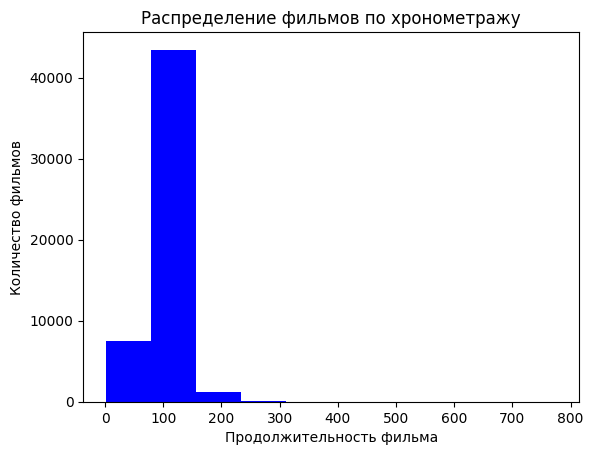

In [ ]:
df.runtime.plot(kind='hist', color='blue')
plt.xlabel('Продолжительность фильма')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по хронометражу')

Средний рейтинг фильмов равен 5,73

In [ ]:
df.rating.mean()

5.7263739414677035

Чаще всего фильмам выставляли оценку в 6,2 балла

In [ ]:
df.rating.mode()

0    6.2
Name: rating, dtype: float64

Первая половина фильмов в датасете с рейтингом меньше 5,9, а вторая больше

In [ ]:
df.rating.median()

5.9

Поскольку распределение близкое к нормальному, можем рассчитать все МЦТ

Text(0.5, 1.0, 'Распределение фильмов по рейтингу')

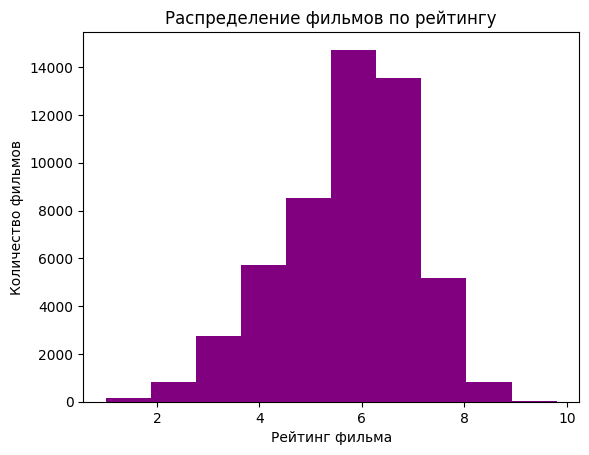

In [ ]:
df.rating.plot(kind='hist', color='purple')
plt.xlabel('Рейтинг фильма')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по рейтингу')

Чаще всего встречаются фильмы в жанре Драма и Романтика

In [ ]:
df.genre.mode()

0    Drama, Romance
Name: genre, dtype: object

Чаще всего встречаются фильмы режиссёра William Beaudine

In [ ]:
df.director.mode()

0    William Beaudine
Name: director, dtype: object

2. Посмотрите на выбросы хотя бы по двум переменным. Визуализируйте с помощью ящика с усами. Проинтерпретируйте весь график.

Text(0.5, 1.0, 'Выбросы среди фильмов по рейтингу')

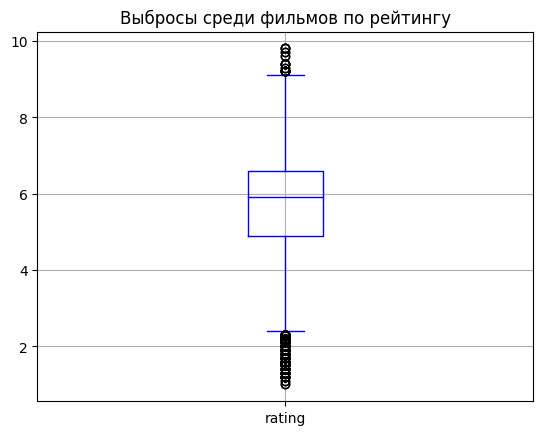

In [ ]:
df.boxplot(column='rating', color='blue')
plt.title('Выбросы среди фильмов по рейтингу')

Медиана (второй квантиль) по рейтингу фильмов равен 5,9. Следовательно первая половина фильмов имеют рейтинг ниже 5,9, а вторая выше.

Вместе с тем существует достаточно много выбросов как в положительную, так и отрицательную сторону. К ним относятся фильмы с рейтингом выше ~9 баллов и ниже ~2,2.

Text(0.5, 1.0, 'Выбросы среди фильмов по продолжительности')

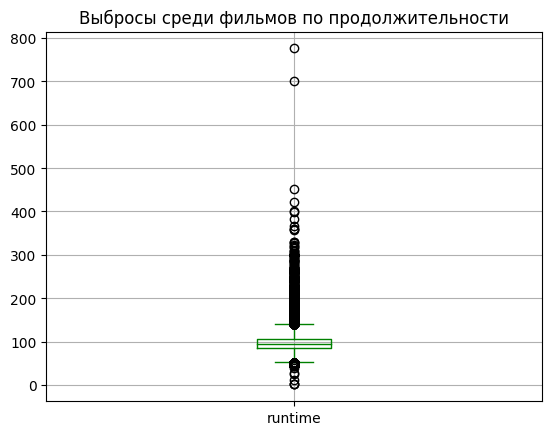

In [ ]:
df.boxplot(column='runtime', color='green')
plt.title('Выбросы среди фильмов по продолжительности')

Поскольку распределение по продолжительности фильмов не является нормальным, "ящик с усами" имеет нестандартный вид.

Большая часть фильмов сосредоточена в диапозоне от 50 до 120 минут с медианой в 100 минут.

Больше всего выбросов свыше 150 минут, а крупнейшими из них являются в 800 и 700 минут.

Выбросы с продолжительностью менее 50 минут также присутствуют, но их гораздо меньше.


3. Хотя бы для одной переменной посчитайте выбросы как с помощью межквартильного размаха, так и с помощью среднеквадратичного отклонения от среднего. Отличаются ли результаты? Проинтерпретируйте их.

4. Если выбросы есть, удалите их (если данных много) или замените на среднее/медиану (если данных мало) и посмотрите, как поменялись меры центральной тенденции в рассматриваемой переменной.

Фильмов, рейтинг которых можно считать выбросом, 463, если считать по межквратильному размаху

In [ ]:
q_d=df.rating.quantile(0.75)-df.rating.quantile(0.25)

top=df.rating.quantile(0.75)+1.5*q_d
bottom=df.rating.quantile(0.25)-1.5*q_d

df[(df['rating']>top)|(df['rating']<bottom)].shape

(463, 9)

Фильмов, рейтинг которых можно считать выбросом, 734, если считать по среднеквадратичному отклонению

In [ ]:
top_s=df.rating.mean()+2.5*df.rating.std()
bottom_s=df.rating.mean()-2.5*df.rating.std()

df[(df['rating']>top_s)|(df['rating']<bottom_s)].shape

(734, 9)

Фильмов, рейтинг которых можно считать выбросом, 3252, если считать по межквратильному размаху

In [ ]:
q_d_2=df.runtime.quantile(0.75)-df.runtime.quantile(0.25)

top_2=df.runtime.quantile(0.75)+1.5*q_d
bottom_2=df.runtime.quantile(0.25)-1.5*q_d

df[(df['runtime']>top_2)|(df['runtime']<bottom_2)].shape

(3252, 9)

Фильмов, рейтинг которых можно считать выбросом, 1136, если считать по среднеквадратичному отклонению

In [ ]:
top_s_2=df.runtime.mean()+2.5*df.runtime.std()
bottom_s_2=df.runtime.mean()-2.5*df.runtime.std()

df[(df['runtime']>top_s_2)|(df['runtime']<bottom_s_2)].shape

(1136, 9)

При подсчете выбросов через среднеквадратичное отклонение выбросов больше, нежеле чем при подсчёте через межквартильный размах

Средний рейтинг фильмов после удаления выбросов по среднеквадратичному отклонению - 5.72

In [ ]:
df[(df['rating']<top_s)|(df['rating']<bottom_s)]['rating'].mean()

5.722062510766169

Мода рейтинга фильмов после удаления выбросов по среднеквадратичному отклонению - 6.2

In [ ]:
df[(df['rating']<top_s)|(df['rating']>bottom_s)]['rating'].mode()

0    6.2
Name: rating, dtype: float64

Медиана рейтинга фильмов после удаления выбросов по среднеквадратичному отклонению - 5.9

In [ ]:
df[(df['rating']<top_s)|(df['rating']<bottom_s)]['rating'].median()

5.9

Средний рейтинг фильмов после удаления выбросов по межквартильному размаху - 5.72

In [ ]:
df[(df['rating']<top)|(df['rating']<bottom)]['rating'].mean()

5.7263739414677035

Мода рейтинга фильмов после удаления выбросов по межквартильному размаху - 6.2

In [ ]:
df[(df['rating']<top)|(df['rating']>bottom)]['rating'].mode()

0    6.2
Name: rating, dtype: float64

Медиана рейтинга фильмов после удаления выбросов по межквартильному размаху - 5.9

In [ ]:
df[(df['rating']<top)|(df['rating']<bottom)]['rating'].median()

5.9

Средний рейтинг фильмов до удаления выбросов - 5.72

In [ ]:
df.rating.mean()

5.7263739414677035

Мода рейтинга фильмов до удаления выбросов - 6.2

In [ ]:
df.rating.mode()

0    6.2
Name: rating, dtype: float64

Медиана рейтинга фильмов до удаления выбросов - 5.9

In [ ]:
df.rating.median()

5.9

Поскольку мода и медиана слаба подвержены выбросам, их значения не изменились даже без учета экстремальных низких и высоких значений.

Изменилось лишь среднее значение, показатель которого уменьшился. В качестве причины можно обозначить то, что большинство выбросов - это именно крупные значения.

В данном конкретном случае методы удаления выбросов по межквартильному размаху и по среднеквадратичному отклонению показывают практически одинаковые результаты с разницей лишь по среднему значению в 0,04. Следовательно, по представленным данным использование обоих методов равнозначно


5. Если в данных есть пропущенные значения, укажите, в каких переменных и сколько их.

NA в датафрейме нет

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52313 entries, 0 to 52312
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     52313 non-null  object 
 1   movie_name   52313 non-null  object 
 2   year         52313 non-null  int64  
 3   certificate  52313 non-null  object 
 4   runtime      52313 non-null  float64
 5   genre        52313 non-null  object 
 6   rating       52313 non-null  float64
 7   description  52313 non-null  object 
 8   director     52313 non-null  object 
 9   age_rating   52313 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


#Этап 4

1. Постройте корреляционную матрицу только по тем признакам, которые можно интерпретировать. (Если таких пар очень много, постройте по 5 любым)


<ipython-input-44-0f16a5d21fab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df.corr(), annot=True)


Text(50.58159722222221, 0.5, 'Рейтинг, продолжительность, год')

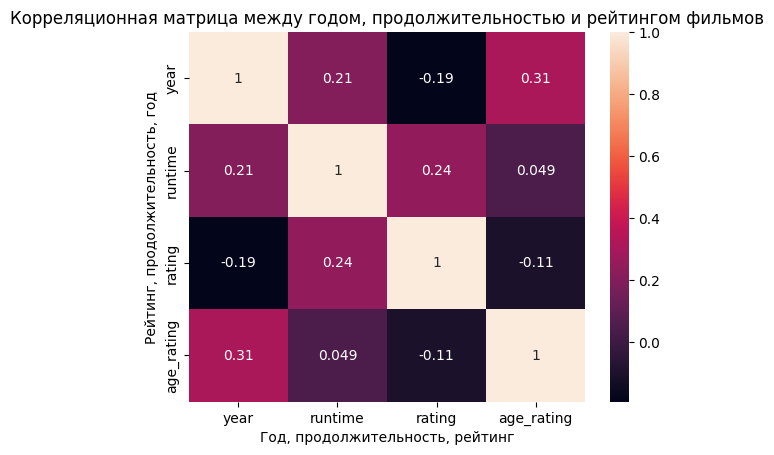

In [ ]:
ax=sns.heatmap(df.corr(), annot=True)

plt.title('Корреляционная матрица между годом, продолжительностью и рейтингом фильмов')
plt.xlabel('Год, продолжительность, рейтинг')
plt.ylabel('Рейтинг, продолжительность, год')

2. Интепретируйте каждое значение корреляции в матрице

Между всеми 5 парами наблюдается слабая корреляция (не более 0,31).

Корреляция между продолжительностью фильма\сериала и датой его выпуска, продолжительностью фильма и его рейтингом, наличием возрастного ограничения, а также продолжительностью фильма\сериала и наличием возрастного ограничения является положительной. Следовательно, увеличение или уменьшение одного из показетелей влечёт за собой аналогичные изменения в другом показетеле.

В свою очередь, между рейтингом и датой публикацией фильма\сериала, а также наличием возрастного ограничения и рейтингом она отрицательная. Следовательно, увеличение или уменьшение одного из показателей приводит к зеркальной реакции другого показателя.

3. Постройте графики рассеяния по этим признакам

<Axes: title={'center': 'Продолжительность фильмов в зависимости от года'}, xlabel='Год создания фильма', ylabel='Продолжительность фильма'>

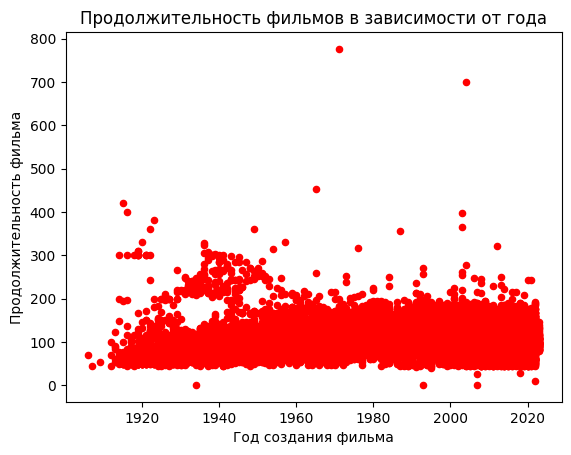

In [ ]:
df.plot(x='year', y='runtime',kind='scatter', title='Продолжительность фильмов в зависимости от года', xlabel='Год создания фильма', ylabel='Продолжительность фильма', c='r')

<Axes: title={'center': 'Рейтинг фильма в зависимости от года'}, xlabel='Год создания фильма', ylabel='Рейтинг фильма'>

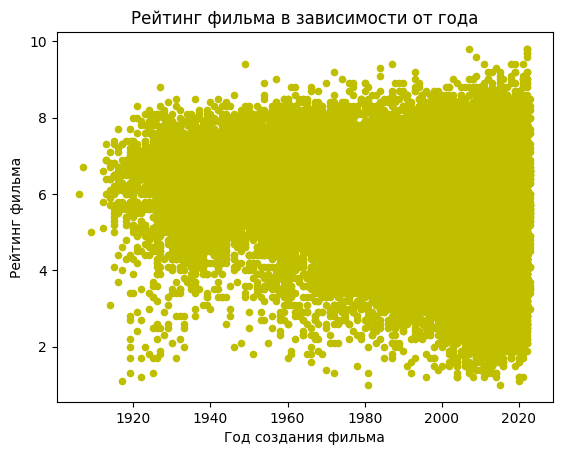

In [ ]:
df.plot(x='year', y='rating',kind='scatter', title='Рейтинг фильма в зависимости от года', xlabel='Год создания фильма', ylabel='Рейтинг фильма', c='y')

<Axes: title={'center': 'Рейтинг фильма в зависимости от продолжительности'}, xlabel='Рейтинг фильма', ylabel='Продолжительность фильма'>

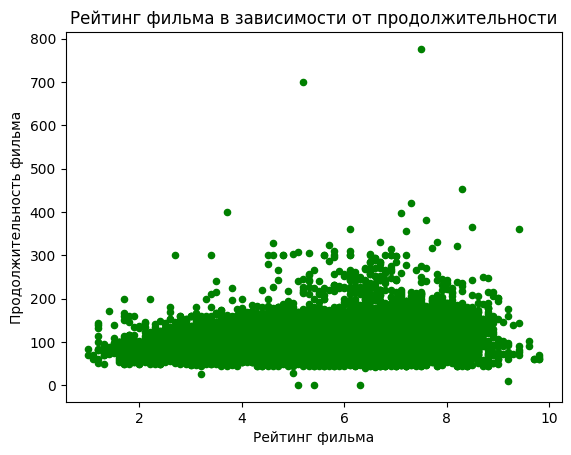

In [ ]:
df.plot(x='rating', y='runtime',kind='scatter', title='Рейтинг фильма в зависимости от продолжительности', xlabel='Рейтинг фильма', ylabel='Продолжительность фильма', c='g')

<Axes: title={'center': 'Наличие возрастного ограничения в зависимости от года'}, xlabel='Год создания фильма', ylabel='Есть ли возрастное ограничение (1 - да, 0 - нет)'>

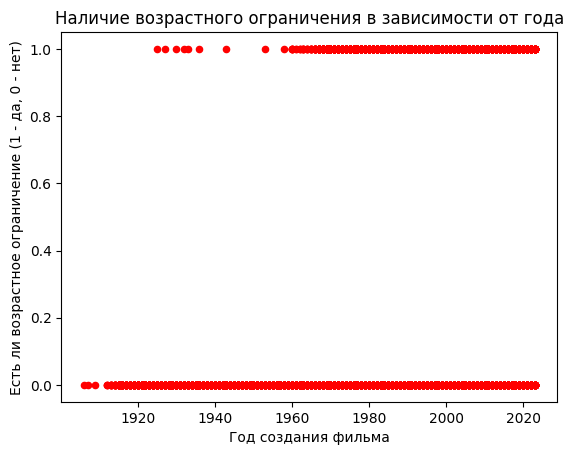

In [ ]:
df.plot(x='year', y='age_rating',kind='scatter', title='Наличие возрастного ограничения в зависимости от года', xlabel='Год создания фильма', ylabel='Есть ли возрастное ограничение (1 - да, 0 - нет)', c='r')

<Axes: title={'center': 'Наличие возрастного ограничения в зависимости от продолжительности'}, xlabel='Продолжительность', ylabel='Есть ли возрастное ограничение (1 - да, 0 - нет)'>

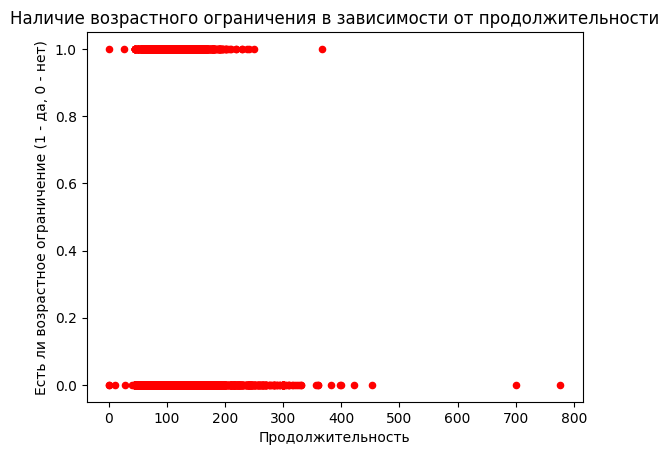

In [ ]:
df.plot(x='runtime', y='age_rating',kind='scatter', title='Наличие возрастного ограничения в зависимости от продолжительности', xlabel='Продолжительность', ylabel='Есть ли возрастное ограничение (1 - да, 0 - нет)', c='r')